In [1]:
import sys
import torch
import numpy as np
from matplotlib import pyplot as plt
import json
from itertools import product
sys.path.append('/workspace/Finite-groups/src')
from model import MLP3
from eval import load_model
%load_ext autoreload
%autoreload 2

In [5]:
prefix = '/workspace/Finite-groups/src/models'
#path = f'{prefix}/2024_07_21_21_21_51_Z_50__clamped_50_'
#path = f'{prefix}/2024_07_21_22_38_07_Z_100__Z_2_50_'
path = f'{prefix}/2024_07_21_22_48_54_Z_48_2__twZ_48_'

In [6]:
fig = load_model(path, 0)

Intersection size: 6912/9216 (0.75)
Added 6912 elements from intersection
Added 0 elements from group 0: Z(48,2)
Added 0 elements from group 1: twZ(48)
Taking random subset: 6912/6912 (1.00)
Train set size: 6912


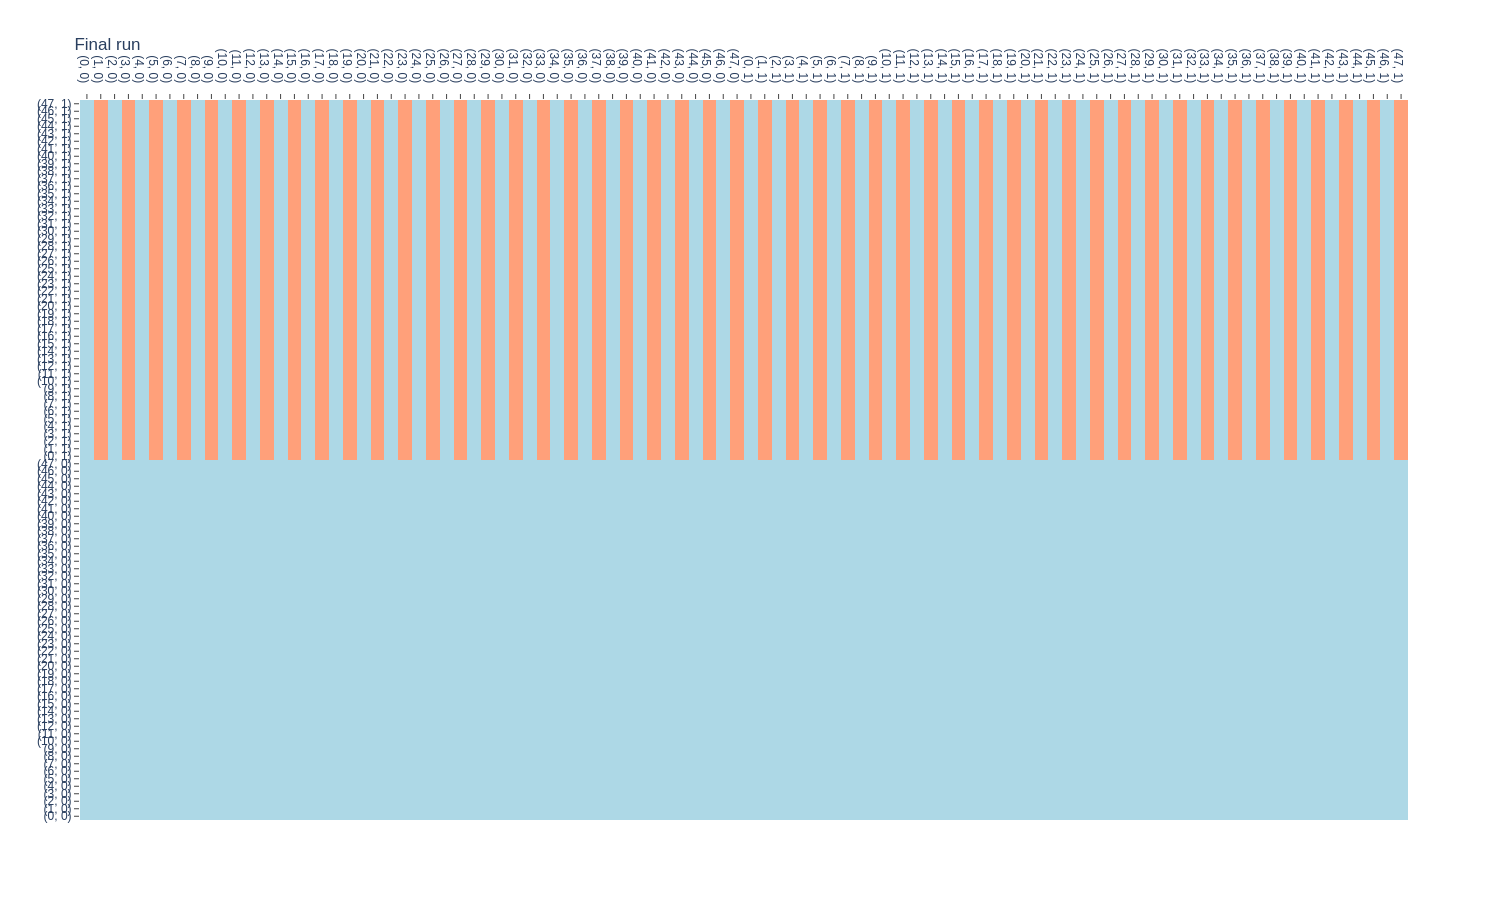

In [7]:
fig.show()

In [9]:
loss_dict = torch.load('/workspace/Finite-groups/src/models/2024-07-13_00-37-04_long_run/losses/007940.pt')
loss_dict = {k: v.detach().cpu().numpy() for k, v in loss_dict.items()}

In [10]:
loss_dict.keys()

dict_keys(['G1_loss', 'G2_loss', 'G1_accuracy', 'G2_accuracy', 'epoch_train_loss', 'epoch_train_acc', 'epoch_train_margin'])

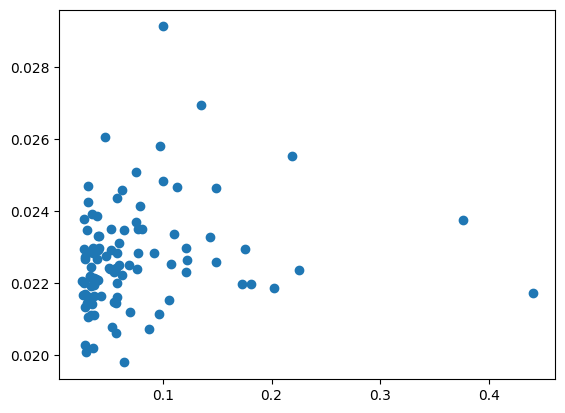

In [17]:
plt.scatter(loss_dict['G1_loss'], loss_dict['epoch_train_loss'])
plt.show()

In [3]:
path = '/home/wilson/Finite-groups/src/models/2024-07-13_19-30-43_four'

In [4]:
params = json.load(open(f'{path}/params.json', 'r'))

In [5]:
params = dotdict(params)

In [6]:
test_inputs = torch.tensor(list(product(range(params.N), repeat=2)), device='cpu')

In [7]:
model = MLP3(params)
state = torch.load(f'{path}/ckpts/001998.pt')
model.load_state_dict(state)

<All keys matched successfully>

In [8]:
model.linear.shape

torch.Size([100, 2, 8])

In [9]:
logits = model(test_inputs)

In [10]:
loss = torch.load(f'{path}/losses/001998.pt')

In [11]:
good = (loss['epoch_train_acc'] == 1).nonzero()

In [14]:
for i in good.cpu().numpy().flatten():
    print(logits.max(dim=2).indices[:,i].reshape((4, 4)))#[1::2,1::2])

tensor([[0, 1, 2, 3],
        [1, 3, 3, 1],
        [2, 3, 0, 1],
        [3, 3, 1, 3]])
tensor([[0, 1, 2, 3],
        [1, 3, 3, 3],
        [2, 3, 0, 1],
        [3, 3, 1, 3]])
tensor([[0, 1, 2, 3],
        [1, 3, 3, 3],
        [2, 3, 0, 1],
        [3, 2, 1, 3]])
tensor([[0, 1, 2, 3],
        [1, 0, 3, 2],
        [2, 3, 0, 1],
        [3, 1, 1, 0]])
tensor([[0, 1, 2, 3],
        [1, 3, 3, 1],
        [2, 3, 0, 1],
        [3, 3, 1, 1]])
tensor([[0, 1, 2, 3],
        [1, 3, 3, 3],
        [2, 3, 0, 1],
        [3, 3, 1, 3]])
tensor([[0, 1, 2, 3],
        [1, 1, 3, 0],
        [2, 3, 0, 1],
        [3, 0, 1, 3]])
tensor([[0, 1, 2, 3],
        [1, 3, 3, 1],
        [2, 3, 0, 1],
        [3, 1, 1, 1]])
tensor([[0, 1, 2, 3],
        [1, 0, 3, 1],
        [2, 3, 0, 1],
        [3, 0, 1, 1]])
tensor([[0, 1, 2, 3],
        [1, 3, 3, 0],
        [2, 3, 0, 1],
        [3, 1, 1, 2]])
tensor([[0, 1, 2, 3],
        [1, 1, 3, 1],
        [2, 3, 0, 1],
        [3, 3, 1, 1]])
tensor([[0, 1, 2, 3],

In [47]:
test_inputs[0]

tensor([0, 0], device='cuda:0')

In [51]:
mult_table = np.zeros((96, 96))

In [53]:
instance = 0
for n, (i, j) in enumerate(test_inputs):
    i = i.item()
    j = j.item()
    mult_table[i, j] = logits[n, instance].item()

RuntimeError: a Tensor with 96 elements cannot be converted to Scalar